## Automatic Learning of Summary Statistics for Approximate Bayesian Computation Using Deep Learning

Samuel Wiqvist, Lund University

Work with: Pierre-Alexandre Mattei (ITU), Umberto Picchini (GU/Chalmers), Jes Frellsen (ITU). 

In [1]:
# load packages and set up
using PyPlot
using Distributions
using Printf
using Random 
using KernelDensity

# data model
Random.seed!(12)
α = 2; β = 2
m = 4; n = 5; p = 0.7
y = rand(Binomial(m,p),n) # generate data

# analytical posterior
posterior = Beta(α + sum(y), β + m*n - sum(y));

# plot function
function plot_abc_inference_results(abc_posterior_samples)
    
    kde_approx_posterior = kde(abc_posterior_samples)

    # plot results
    PyPlot.figure(figsize=(7,4))
    PyPlot.plot(kde_approx_posterior.x,kde_approx_posterior.density, "b")
    PyPlot.plot(0:0.01:1,pdf.(posterior, 0:0.01:1), "r")
    PyPlot.plot(0:0.01:1, pdf.(prior, 0:0.01:1), "g")
    PyPlot.plot((p, p), (0, maximum(pdf.(posterior, 0:0.01:1))), "k")
    PyPlot.xlabel("p")
    PyPlot.ylabel("Density")
    PyPlot.legend(["ABC posterior"; "Analytical posterior"; "Prior"; "True value"])

end 

plot_abc_inference_results (generic function with 1 method)

#### ABC rejection sampling for the Beta-Binomial model

In [2]:
# Define the model and the prior distribution.

Random.seed!(12) # fix random numbers 

# model parameters
m = 4; n = 5; p_true = 0.7

 # defined the data generating function
data_generator(p) = rand(Binomial(m,p),n) 

# generate data
y = data_generator(p_true)

# prior 
α = 2; β = 2
prior = Beta(2,2);

#### ABC rejection sampling for the Beta-Binomial model 

In [3]:
# ABC rejection sampling algorithm 
function abc_rs(;N_propsals::Int, ϵ::Real)
    
    abc_posterior_samples = zeros(N_propsals)
    nbr_accapted_proposals = 0 
    
    for i in 1:N_propsals
    
        p_star = rand(prior) # sample parameter proposal from prior 
        y_star = data_generator(p_star) # generate data from the data model
        Δ = sum(abs.(sort(y_star)-sort(y))) # compute ABC distance      
        
        if Δ <= ϵ # accapte proposal 
            nbr_accapted_proposals += 1 
            abc_posterior_samples[nbr_accapted_proposals] = p_star 
        end 
    end 
    
    return abc_posterior_samples[1:nbr_accapted_proposals]
end; 

#### ABC rejection sampling for the Beta-Binomial model 

In [4]:
# Run ABC rejection sampling
abc_posterior_samples = abc_rs(N_propsals = 10^6, ϵ  = 0);
@printf "Accaptance rate: %.2f %%" length(abc_posterior_samples)/N_proposals*100

ErrorException: function abc_rs does not accept keyword arguments

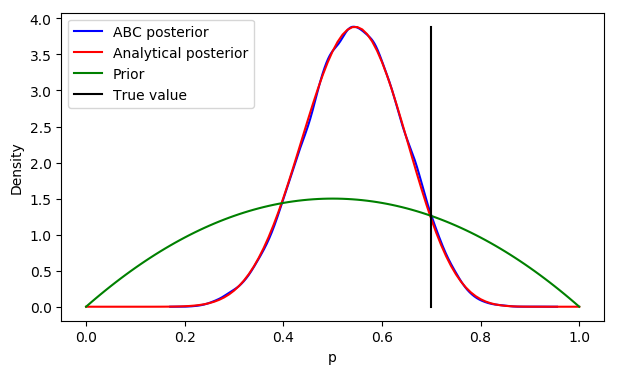

In [110]:
# plot posterior inference results 
plot_abc_inference_results(abc_posterior_samples);

#### ABC rejection sampling for the Beta-Binomial model (with summary statistics)

In [97]:
# defined the summary statistics 
S(y) = [mean(y); std(y)];

#### ABC rejection sampling for the Beta-Binomial model (with summary statistics)

In [119]:
# ABC rejection sampling algorithm 
function abc_rs_summary_stats(;N_propsals::Int, ϵ::Real, S::Function)
    
    abc_posterior_samples = zeros(N_propsals)
    nbr_accapted_proposals = 0 
    
    for i in 1:N_propsals
    
        p_star = rand(prior) # sample parameter proposal from prior 
        y_star = data_generator(p_star) # generate data from the data model
        Δ = sum(abs.(S(y_star)-S(y))) # compute ABC distance      
        
        if Δ <= ϵ # accapte proposal 
            nbr_accapted_proposals += 1 
            abc_posterior_samples[nbr_accapted_proposals] = p_star 
        end 
    end 
    
    return abc_posterior_samples[1:nbr_accapted_proposals]
end; 

#### ABC rejection sampling for the Beta-Binomial model (with summary statistics)

In [121]:
# Run ABC rejection sampling
abc_posterior_samples = abc_rs_summary_stats(N_propsals = 10^6, ϵ  = 0.2, S=S);
@printf "Accaptance rate: %.2f %%" length(abc_posterior_samples)/N_proposals*100

Accaptance rate: 1.76 %

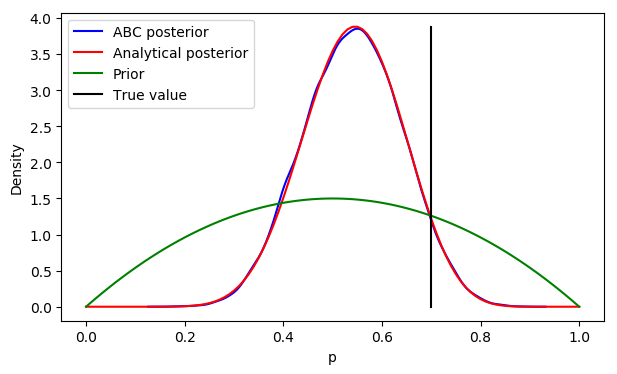

In [122]:
# plot posterior inference results 
plot_abc_inference_results(abc_posterior_samples);

## Using summary statistics in ABC  

## The end

Homepage: http://www.maths.lu.se/staff/samuel-wiqvist/

Github: SamuelWiqvist

Twitter: samuel_wiqvist

Outline 

* Intro to ABC with simple Beta-Bionomial model (we will only have one simple example since it is really annoying to create the slides for the code examples)
* Something on summary statistics 
* Why we want the PEN network 
* How the PEN network works, why it is particular suitable for timeseries 
* Something on our results (MA2 model with noise)
* It could be nice to use PEN for the simple Beta-Bionomial model so that we show the full workflow